In [1]:
import pandas as pd
import os

In [2]:
scoring = pd.read_pickle(os.path.join("data", "scoring.pickle"))
team_splits = pd.read_pickle(os.path.join("data.", "team_splits.pickle"))

In [3]:
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [4]:
three_years = scoring.loc[(scoring.year > 2000) & (scoring.year < 2004)]
three_years

,playerID,year,tmID,GP,G,A,Pts,SOG
9,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0
10,abidra01,2002,PIT,3.0,0.0,0.0,0.0,7.0
11,abidra01,2003,PIT,16.0,3.0,2.0,5.0,35.0
39,adamscr01,2001,CAR,33.0,0.0,1.0,1.0,17.0
40,adamscr01,2002,CAR,81.0,6.0,12.0,18.0,107.0
...,...,...,...,...,...,...,...,...
28608,zyuzian01,2001,TBL,9.0,0.0,2.0,2.0,14.0
28609,zyuzian01,2001,NJD,38.0,1.0,2.0,3.0,47.0
28610,zyuzian01,2002,NJD,1.0,0.0,1.0,1.0,0.0
28611,zyuzian01,2002,MIN,66.0,4.0,12.0,16.0,113.0


In [5]:
# One record per player/year
three_years = three_years.drop_duplicates(subset=["playerID", "year"])
three_years

,playerID,year,tmID,GP,G,A,Pts,SOG
9,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0
11,abidra01,2003,PIT,16.0,3.0,2.0,5.0,35.0
39,adamscr01,2001,CAR,33.0,0.0,1.0,1.0,17.0
40,adamscr01,2002,CAR,81.0,6.0,12.0,18.0,107.0
41,adamscr01,2003,CAR,80.0,7.0,10.0,17.0,110.0
...,...,...,...,...,...,...,...,...
28585,zubruda01,2002,WAS,63.0,13.0,22.0,35.0,104.0
28586,zubruda01,2003,WAS,54.0,12.0,15.0,27.0,115.0
28608,zyuzian01,2001,TBL,9.0,0.0,2.0,2.0,14.0
28610,zyuzian01,2002,NJD,1.0,0.0,1.0,1.0,0.0


In [6]:
# Get three random players with complete history between 2001-2003
counts = three_years["playerID"].value_counts()
counts

lessafr01    3
liljaan01    3
matviri01    3
maybr01      3
mayerja01    3
            ..
divisto01    1
nasreal01    1
domero01     1
myrvoan01    1
payerse01    1
Name: playerID, Length: 1320, dtype: int64

In [7]:
ids = counts[counts == 3].sample(3).index
ids

Index(['modanmi01', 'schnaro01', 'downeaa01'], dtype='object')

In [8]:
three_years['playerID']

9         abidra01
11        abidra01
39       adamscr01
40       adamscr01
41       adamscr01
           ...    
28585    zubruda01
28586    zubruda01
28608    zyuzian01
28610    zyuzian01
28612    zyuzian01
Name: playerID, Length: 2957, dtype: object

In [9]:
three_years['playerID'].isin(ids)

9        False
11       False
39       False
40       False
41       False
         ...  
28585    False
28586    False
28608    False
28610    False
28612    False
Name: playerID, Length: 2957, dtype: bool

In [10]:
df3 = three_years.loc[three_years['playerID'].isin(ids)]
df3

,playerID,year,tmID,GP,G,A,Pts,SOG
6112,downeaa01,2001,CHI,36.0,1.0,0.0,1.0,10.0
6113,downeaa01,2002,DAL,43.0,1.0,1.0,2.0,14.0
6114,downeaa01,2003,DAL,37.0,1.0,1.0,2.0,11.0
17415,modanmi01,2001,DAL,78.0,34.0,43.0,77.0,219.0
17416,modanmi01,2002,DAL,79.0,28.0,57.0,85.0,193.0
17417,modanmi01,2003,DAL,76.0,14.0,30.0,44.0,152.0
22934,schnaro01,2001,NAS,1.0,0.0,0.0,0.0,0.0
22935,schnaro01,2002,NAS,1.0,0.0,0.0,0.0,0.0
22936,schnaro01,2003,NAS,20.0,0.0,3.0,3.0,10.0


In [11]:
basic_df3 = df3[["playerID", "year", "G"]]
basic_df3

,playerID,year,G
6112,downeaa01,2001,1.0
6113,downeaa01,2002,1.0
6114,downeaa01,2003,1.0
17415,modanmi01,2001,34.0
17416,modanmi01,2002,28.0
17417,modanmi01,2003,14.0
22934,schnaro01,2001,0.0
22935,schnaro01,2002,0.0
22936,schnaro01,2003,0.0


In [12]:
pivot = basic_df3.pivot(index="playerID", columns="year", values="G")
pivot

year,2001,2002,2003
playerID,,,
downeaa01,1.0,1.0,1.0
modanmi01,34.0,28.0,14.0
schnaro01,0.0,0.0,0.0


In [13]:
pivot.index

Index(['downeaa01', 'modanmi01', 'schnaro01'], dtype='object', name='playerID')

In [14]:
pivot.columns

Int64Index([2001, 2002, 2003], dtype='int64', name='year')

In [15]:
pivot.index.name = None
pivot.columns.name = None

In [16]:
pivot

,2001,2002,2003
downeaa01,1.0,1.0,1.0
modanmi01,34.0,28.0,14.0
schnaro01,0.0,0.0,0.0


In [17]:
pivot.index.name = "playerID"
pivot.columns.name = "year"

In [18]:
basic_df3.set_index("playerID")

,year,G
playerID,,
downeaa01,2001,1.0
downeaa01,2002,1.0
downeaa01,2003,1.0
modanmi01,2001,34.0
modanmi01,2002,28.0
modanmi01,2003,14.0
schnaro01,2001,0.0
schnaro01,2002,0.0
schnaro01,2003,0.0


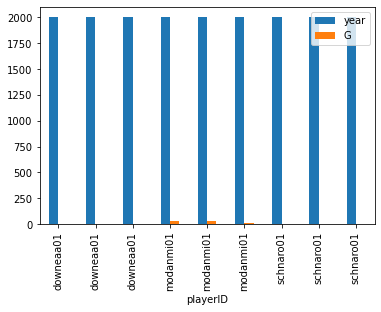

In [19]:
basic_df3.set_index("playerID").plot.bar();

<AxesSubplot:xlabel='playerID'>

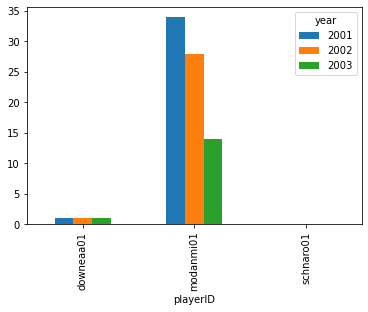

In [20]:
pivot.plot.bar()

In [21]:
pivot

year,2001,2002,2003
playerID,,,
downeaa01,1.0,1.0,1.0
modanmi01,34.0,28.0,14.0
schnaro01,0.0,0.0,0.0


In [22]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,downeaa01,1.0,1.0,1.0
1,modanmi01,34.0,28.0,14.0
2,schnaro01,0.0,0.0,0.0


In [23]:
pivot.melt()

,variable,value
0,playerID,downeaa01
1,playerID,modanmi01
2,playerID,schnaro01
3,2001,1.0
4,2001,34.0
5,2001,0.0
6,2002,1.0
7,2002,28.0
8,2002,0.0
9,2003,1.0


In [24]:

pivot.melt(id_vars="playerID")

,playerID,variable,value
0,downeaa01,2001,1.0
1,modanmi01,2001,34.0
2,schnaro01,2001,0.0
3,downeaa01,2002,1.0
4,modanmi01,2002,28.0
5,schnaro01,2002,0.0
6,downeaa01,2003,1.0
7,modanmi01,2003,14.0
8,schnaro01,2003,0.0


In [25]:

pivot.melt(id_vars="playerID", var_name="year", value_name="goals")

,playerID,year,goals
0,downeaa01,2001,1.0
1,modanmi01,2001,34.0
2,schnaro01,2001,0.0
3,downeaa01,2002,1.0
4,modanmi01,2002,28.0
5,schnaro01,2002,0.0
6,downeaa01,2003,1.0
7,modanmi01,2003,14.0
8,schnaro01,2003,0.0


In [26]:
pivot.melt(id_vars="playerID", value_vars=[2001, 2002], var_name="year", value_name="goals")

,playerID,year,goals
0,downeaa01,2001,1.0
1,modanmi01,2001,34.0
2,schnaro01,2001,0.0
3,downeaa01,2002,1.0
4,modanmi01,2002,28.0
5,schnaro01,2002,0.0


In [27]:
larger_df3 = df3[["playerID", "tmID", "year", "G"]]
larger_df3

,playerID,tmID,year,G
6112,downeaa01,CHI,2001,1.0
6113,downeaa01,DAL,2002,1.0
6114,downeaa01,DAL,2003,1.0
17415,modanmi01,DAL,2001,34.0
17416,modanmi01,DAL,2002,28.0
17417,modanmi01,DAL,2003,14.0
22934,schnaro01,NAS,2001,0.0
22935,schnaro01,NAS,2002,0.0
22936,schnaro01,NAS,2003,0.0


In [28]:
larger_df3.pivot(index=["playerID", "tmID"], columns="year", values="G")

year            2001  2002  2003
playerID  tmID                  
downeaa01 CHI    1.0   NaN   NaN
          DAL    NaN   1.0   1.0
modanmi01 DAL   34.0  28.0  14.0
schnaro01 NAS    0.0   0.0   0.0

In [29]:
larger_df3 = df3[["playerID", "year", "G", "A"]]
larger_df3

,playerID,year,G,A
6112,downeaa01,2001,1.0,0.0
6113,downeaa01,2002,1.0,1.0
6114,downeaa01,2003,1.0,1.0
17415,modanmi01,2001,34.0,43.0
17416,modanmi01,2002,28.0,57.0
17417,modanmi01,2003,14.0,30.0
22934,schnaro01,2001,0.0,0.0
22935,schnaro01,2002,0.0,0.0
22936,schnaro01,2003,0.0,3.0


In [30]:
pivot = larger_df3.pivot(index="playerID", columns="year", values=["G", "A"])
pivot

G                 A            
year       2001  2002  2003  2001  2002  2003
playerID                                     
downeaa01   1.0   1.0   1.0   0.0   1.0   1.0
modanmi01  34.0  28.0  14.0  43.0  57.0  30.0
schnaro01   0.0   0.0   0.0   0.0   0.0   3.0

In [31]:
pivot.columns

MultiIndex([('G', 2001),
            ('G', 2002),
            ('G', 2003),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003)],
           names=[None, 'year'])

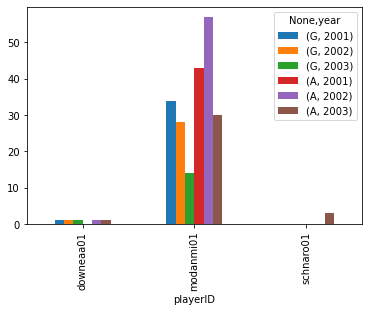

In [32]:
pivot.plot.bar();